**Proporción de jóvenes sin educación, empleo ni capacitación, mujeres (% de la población de mujeres jóvenes)

Introducción:

Módulo 1: Se creo una base de datos mundial de pobreza, zonas marginales, educación, falta de agua, seguro social y acuerdos ambientales por país, dichos datos fueron exraídos de la página de "The World Bank" en la sección de
indicadores de desarrollo sostenible ODS 

In [2]:
from IPython.display import Image
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
v_sin_ed = pd.read_csv('Porp_varones_sin educación_empleo_capacitación.csv',  encoding = 'ISO-8859-1')

v_sin_ed.head()

,Country Name,Country Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,AGO,NaN,22.370001,NaN,NaN,NaN,NaN,20.260000,NaN,7.610000,NaN,NaN,21.709999,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,30.84,25.34,25.129999,25.690001,27.650000,25.959999,29.82,30.170000,28.480000,27.190001,25.080000,25.530001,26.200001,NaN
2,Argentina,ARG,NaN,16.100000,15.32,14.25,NaN,14.52,15.800000,14.730000,13.890000,13.780000,14.38,15.140000,NaN,NaN,15.780000,15.530000,16.830000,NaN
3,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,40.189999,NaN,44.779999,34.330002,46.43,37.520000,36.349998,35.389999,35.720001,28.320000,28.070000,NaN
4,Australia,AUS,NaN,NaN,NaN,NaN,NaN,NaN,10.290000,10.800000,9.480000,9.440000,10.22,9.730000,9.450000,8.420000,8.890000,NaN,NaN,NaN


In [4]:
m_sin_ed = pd.read_csv('Porp_mujeres_sin educación_empleo_capacitación.csv',  encoding = 'ISO-8859-1')

m_sin_ed.head()

,Country_name,Country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afganistán,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.260000,NaN,NaN,65.889999,NaN,NaN,NaN
1,Angola,AGO,38.34,NaN,NaN,NaN,NaN,30.850000,NaN,12.230000,NaN,NaN,33.560001,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,NaN,NaN,NaN,36.740002,30.799999,35.759998,33.419998,32.520000,29.690001,32.040001,32.650002,31.280001,27.620001,27.610001,27.77,25.450001,NaN
3,Argentina,ARG,25.82,24.459999,24.76,NaN,24.430000,24.340000,24.219999,22.980000,23.100000,24.000000,24.510000,NaN,NaN,22.780001,22.49,21.690001,NaN
4,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,40.849998,NaN,44.459999,39.279999,42.570000,38.490002,34.799999,37.830002,37.529999,33.73,28.709999,NaN


In [122]:
m_desempleo_pobact = pd.read_csv('Prop_muejres_desempleo_pobactiva.csv', encoding = 'ISO-8859-1')

m_desempleo_pobact.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afganistán,AFG,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,14.360000,14.610000,14.610000,14.760000,14.950000,14.580000,...,14.790000,14.86000,14.700000,14.53000,14.450000,14.330000,14.090000,13.920000,13.81000,NaN
1,Angola,AGO,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,2.590000,2.830000,2.900000,2.910000,2.940000,3.020000,...,7.720000,7.81000,7.780000,7.71000,7.650000,7.500000,7.410000,7.280000,7.22000,NaN
2,Albania,ALB,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,15.600000,16.040000,16.640000,16.780000,16.790000,16.760000,...,13.750000,11.46000,13.340000,15.45000,17.120000,14.450000,12.480000,11.870000,11.31000,NaN
3,El mundo árabe,ARB,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,15.798447,14.922861,16.398201,17.185668,17.575035,16.103498,...,18.863908,19.34257,19.455714,19.68891,20.031598,19.997269,20.388426,19.903433,19.86979,NaN
4,Emiratos Árabes Unidos,ARE,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,2.350000,2.110000,2.040000,2.200000,2.360000,2.340000,...,5.960000,5.72000,5.270000,4.62000,4.450000,4.200000,7.140000,6.190000,6.33000,NaN


In [6]:
V_desempleo_pobact = pd.read_csv('Prop_varones_desempleo_pobactiva.csv', encoding = 'ISO-8859-1')

V_desempleo_pobact.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afganistán,AFG,10.820000,10.880000,11.060000,11.090000,11.040000,11.120000,11.080000,11.080000,...,10.920000,10.900000,10.880000,10.890000,10.780000,10.680000,10.570000,10.420000,10.290000,10.190000
1,Angola,AGO,4.830000,4.680000,4.740000,4.760000,4.730000,4.670000,4.760000,4.700000,...,7.950000,7.010000,6.930000,6.990000,6.910000,6.880000,6.900000,6.780000,6.720000,6.630000
2,Albania,ALB,16.690000,16.560000,16.420000,16.410000,16.390000,16.420000,16.670000,16.380000,...,12.760000,13.270000,14.780000,17.630000,19.810000,17.250000,16.120000,14.410000,12.620000,11.580000
3,El mundo árabe,ARB,10.448872,11.283823,11.855112,11.783604,12.053257,11.377346,10.760124,10.804038,...,7.004786,8.082066,8.183019,8.210358,8.281237,8.222691,7.933856,8.141572,7.788513,7.736827
4,Emiratos Árabes Unidos,ARE,1.680000,1.700000,1.690000,1.700000,1.730000,1.830000,1.920000,2.010000,...,1.920000,1.720000,1.540000,1.400000,1.350000,1.220000,1.120000,1.480000,1.390000,1.420000


In [7]:
grl_desempleo_pobact = pd.read_csv('Prop_general_desempleo_pobactiva.csv', encoding = 'ISO-8859-1')

grl_desempleo_pobact.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afganistán,AFG,10.820000,10.880000,11.060000,11.090000,11.040000,11.120000,11.080000,11.080000,...,10.900000,10.880000,10.890000,10.780000,10.680000,10.570000,10.420000,10.290000,10.190000,NaN
1,Angola,AGO,4.830000,4.680000,4.740000,4.760000,4.730000,4.670000,4.760000,4.700000,...,7.010000,6.930000,6.990000,6.910000,6.880000,6.900000,6.780000,6.720000,6.630000,NaN
2,Albania,ALB,16.690000,16.560000,16.420000,16.410000,16.390000,16.420000,16.670000,16.380000,...,13.270000,14.780000,17.630000,19.810000,17.250000,16.120000,14.410000,12.620000,11.580000,NaN
3,El mundo árabe,ARB,10.448872,11.283823,11.855112,11.783604,12.053257,11.377346,10.760124,10.804038,...,8.082066,8.183019,8.210358,8.281237,8.222691,7.933856,8.141572,7.788513,7.736827,NaN
4,Emiratos Árabes Unidos,ARE,1.680000,1.700000,1.690000,1.700000,1.730000,1.830000,1.920000,2.010000,...,1.720000,1.540000,1.400000,1.350000,1.220000,1.120000,1.480000,1.390000,1.420000,NaN


In [8]:
mex_1 = grl_desempleo_pobact['Country Name'] == 'México'

In [9]:
grl_desempleo_pobact[mex_1]

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
132,México,MEX,2.63,2.82,3.08,4.18,6.24,4.68,3.15,3.04,...,5.19,4.89,4.89,4.79,4.23,3.83,3.31,3.2,3.46,NaN


Creamos una función que calcule la media MUNDIAL por año en los diferentes DF

In [10]:
def media_col(columna):
    media= columna.mean()
    return media

In [11]:
varones_2013 = v_sin_ed['2013'].mean()
varones_2017 = v_sin_ed['2017'].mean()
varones_2019 = v_sin_ed['2019'].mean()

In [12]:
mujeres_2013 = m_sin_ed['2013'].mean()
mujeres_2017 = m_sin_ed['2017'].mean()
mujeres_2019 = m_sin_ed['2019'].mean()

In [13]:
v_sin_ed_mean = v_sin_ed.mean()
v_sin_ed_min = v_sin_ed.min()
v_sin_ed_max = v_sin_ed.max()
v_sin_ed_median = v_sin_ed.median()
v_sin_ed_quantile75 = v_sin_ed.quantile(0.75)
v_sin_ed_quantile50 = v_sin_ed.quantile(0.50)
v_sin_ed_quantile25 = v_sin_ed.quantile(0.25)
v_sin_ed_rango = v_sin_ed_quantile75-v_sin_ed_quantile50

In [14]:
v_medidas = pd.DataFrame ({'mean':v_sin_ed_mean, 'min': v_sin_ed_min, 'max':v_sin_ed_max, 'median':v_sin_ed_median,
                          'quartile75':v_sin_ed_quantile75, 'quartile50':v_sin_ed_quantile50, 'quartile25':v_sin_ed_quantile25,
                         'rango':v_sin_ed_rango})
v_medidas

,mean,min,max,median,quartile75,quartile50,quartile25,rango
2003,12.317982,4.16,31.049999,10.449309,14.373009,10.449309,8.692500,3.923699
2004,11.794975,4.21,29.690001,10.545000,14.485000,10.545000,8.555000,3.940000
2005,11.841800,3.57,29.26,11.535902,14.660243,11.535902,8.363763,3.124341
2006,12.262255,3.42,38.919998,10.807034,13.488761,10.807034,8.045000,2.681727
2007,11.615074,0.26,31.59,10.020000,12.400000,10.020000,8.120000,2.379999
2008,11.418649,0.13,28.059999,10.145000,14.005000,10.145000,7.837500,3.860000
2009,13.630317,2.69,40.189999,12.261781,16.779999,12.261781,9.305000,4.518218
2010,13.255717,0.15,32.220001,12.665000,15.752500,12.665000,8.749822,3.087500
2011,14.185815,4.12,44.779999,12.880000,16.080000,12.880000,9.580000,3.200000
2012,13.504228,2.84,46.169998,12.790000,15.482500,12.790000,9.070000,2.692500


In [15]:
años= {2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}

In [16]:
v_medidas= v_medidas.drop(['Country Code', 'Country Name'])

In [17]:
v_medidas= v_medidas.drop('2003')

In [18]:
v_medidas['años']= años

In [19]:
v_medidas

,mean,min,max,median,quartile75,quartile50,quartile25,rango,años
2004,11.794975,4.21,29.690001,10.545000,14.485000,10.545000,8.555000,3.940000,2004
2005,11.841800,3.57,29.26,11.535902,14.660243,11.535902,8.363763,3.124341,2005
2006,12.262255,3.42,38.919998,10.807034,13.488761,10.807034,8.045000,2.681727,2006
2007,11.615074,0.26,31.59,10.020000,12.400000,10.020000,8.120000,2.379999,2007
2008,11.418649,0.13,28.059999,10.145000,14.005000,10.145000,7.837500,3.860000,2008
2009,13.630317,2.69,40.189999,12.261781,16.779999,12.261781,9.305000,4.518218,2009
2010,13.255717,0.15,32.220001,12.665000,15.752500,12.665000,8.749822,3.087500,2010
2011,14.185815,4.12,44.779999,12.880000,16.080000,12.880000,9.580000,3.200000,2011
2012,13.504228,2.84,46.169998,12.790000,15.482500,12.790000,9.070000,2.692500,2012
2013,13.551885,2.7,46.43,12.878401,15.260000,12.878401,9.005000,2.381599,2013


In [20]:
m_sin_ed_mean = m_sin_ed.mean()
m_sin_ed_min = m_sin_ed.min()
m_sin_ed_max = m_sin_ed.max()
m_sin_ed_median = m_sin_ed.median()
m_sin_ed_quantile75 = m_sin_ed.quantile(0.75)
m_sin_ed_quantile50 = m_sin_ed.quantile(0.50)
m_sin_ed_quantile25 = m_sin_ed.quantile(0.25)
m_sin_ed_rango = m_sin_ed_quantile75-m_sin_ed_quantile50

In [23]:
m_medidas = pd.DataFrame ({'mean':m_sin_ed_mean, 'min': m_sin_ed_min, 'max':m_sin_ed_max, 'median':m_sin_ed_median,
                          'quartile75':m_sin_ed_quantile75, 'quartile50':m_sin_ed_quantile50, 'quartile25':m_sin_ed_quantile25,
                         'rango':m_sin_ed_rango})
m_medidas

,mean,min,max,median,quartile75,quartile50,quartile25,rango
2004,20.131992,5.07,47.25,16.322190,27.000000,16.322190,10.945000,10.677810
2005,22.062146,5.0,56.919998,18.239060,28.465349,18.239060,12.870000,10.226290
2006,21.235020,3.81,64.239998,16.520000,27.720654,16.520000,12.032500,11.200655
2007,19.622012,0.44,70.470001,14.505325,27.049999,14.505325,11.235000,12.544674
2008,19.292192,3.98,60.43,14.801153,26.132646,14.801153,11.055000,11.331493
2009,20.980185,4.5,57.5,19.038778,27.776210,19.038778,12.150000,8.737432
2010,22.104236,0.3,56.919998,19.105000,28.957500,19.105000,12.777500,9.852500
2011,20.746881,0.36,76.589996,18.465200,27.572501,18.465200,12.485000,9.107301
2012,22.249056,4.27,79.110001,19.109002,27.630160,19.109002,13.200000,8.521158
2013,20.704686,4.01,55.52,19.024944,27.349999,19.024944,12.979427,8.325056


In [24]:
m_medidas= m_medidas.drop(['Country_code', 'Country_name'])

In [25]:
años_m= {2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}

In [26]:
m_medidas['años']= años_m

In [27]:
m_medidas

,mean,min,max,median,quartile75,quartile50,quartile25,rango,años
2004,20.131992,5.07,47.25,16.322190,27.000000,16.322190,10.945000,10.677810,2004
2005,22.062146,5.0,56.919998,18.239060,28.465349,18.239060,12.870000,10.226290,2005
2006,21.235020,3.81,64.239998,16.520000,27.720654,16.520000,12.032500,11.200655,2006
2007,19.622012,0.44,70.470001,14.505325,27.049999,14.505325,11.235000,12.544674,2007
2008,19.292192,3.98,60.43,14.801153,26.132646,14.801153,11.055000,11.331493,2008
2009,20.980185,4.5,57.5,19.038778,27.776210,19.038778,12.150000,8.737432,2009
2010,22.104236,0.3,56.919998,19.105000,28.957500,19.105000,12.777500,9.852500,2010
2011,20.746881,0.36,76.589996,18.465200,27.572501,18.465200,12.485000,9.107301,2011
2012,22.249056,4.27,79.110001,19.109002,27.630160,19.109002,13.200000,8.521158,2012
2013,20.704686,4.01,55.52,19.024944,27.349999,19.024944,12.979427,8.325056,2013


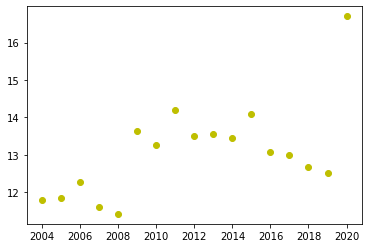

In [28]:
plt.scatter(x=v_medidas['años'],y=v_medidas['mean'] , color = 'y')

<ipython-input-29-c7e13515cd27>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax.plot(v_medidas['años'],v_medidas['mean'], '-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de varones sin educación ni capación mundial -- Media de la muestra')

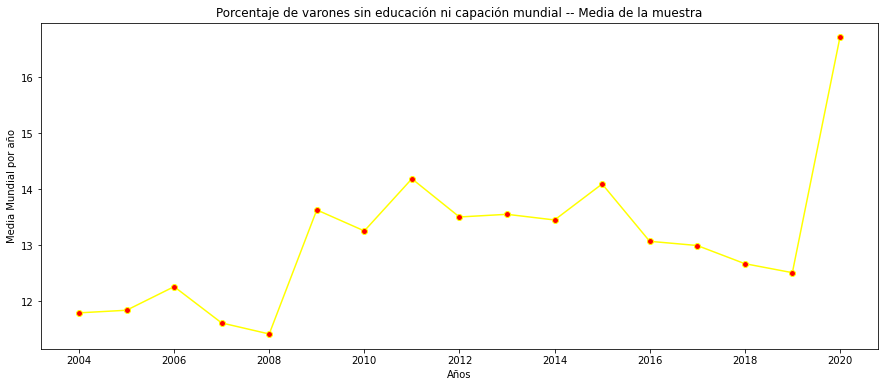

In [29]:
fig, ax = plt.subplots(figsize= (15,6))
ax.plot(v_medidas['años'],v_medidas['mean'], '-ok', color = 'yellow', markerfacecolor = 'red' )
plt.xlabel('Años')
plt.ylabel('Media Mundial por año')
plt.title('Porcentaje de varones sin educación ni capación mundial -- Media de la muestra')

<ipython-input-30-b0c43a503830>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['mean'],'-ok', color = 'yellow', markerfacecolor = 'red' )
<ipython-input-30-b0c43a503830>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['mean'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Media de la muestra')

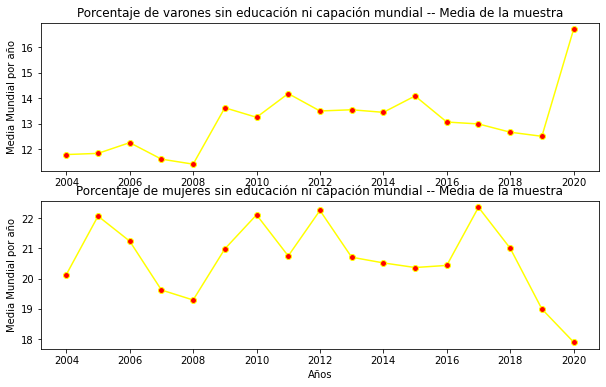

In [30]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['mean'],'-ok', color = 'yellow', markerfacecolor = 'red' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Media Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Media de la muestra')

ax[1].plot(m_medidas['años'],m_medidas['mean'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Media Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Media de la muestra')

Que pasa con el año 2020 para el porcentaje de la población de mujeres que no tiene educación ni capacitación?

Es un resultado real? o por falta de datos aparenta que la tasa bajo?

In [31]:
m_medidas_2020 = m_medidas['años'] == 2020
m_medidas[m_medidas_2020]

,mean,min,max,median,quartile75,quartile50,quartile25,rango,años
2020,17.903558,16.67,18.5,18.222116,18.368173,18.222116,17.757501,0.146057,2020


In [32]:
m_sin_ed['2020'].isnull().sum()

132

In [34]:
m_sin_ed_filt = pd.DataFrame (m_sin_ed['2020'],m_sin_ed['Country_name'])
m_sin_ed_filtrado2020 = ({'country':m_sin_ed['Country_name'],'Año2020': m_sin_ed['2020']})

In [35]:
m_sin_ed_filt.isnull().sum()

2020    136
dtype: int64

In [36]:
m_sin_ed_2020 = pd.read_csv('prop_mujeres_sin_ed_2020.csv', encoding = 'ISO-8859-1')
m_sin_ed_2020.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Canadá,CAN,13.04,12.77,12.250000,12.78,12.750000,13.32,13.510000,13.41,13.500000,13.40,13.39,13.33,12.89,12.11,12.27,11.670000,16.670000
1,Estados Unidos,USA,19.00,18.82,18.190001,17.73,18.360001,19.98,20.190001,19.85,19.709999,19.07,17.90,16.27,15.71,14.67,14.31,13.580000,18.500000
2,Viet Nam,VNM,NaN,NaN,NaN,12.37,NaN,12.88,10.690000,10.78,11.660000,12.33,12.17,12.62,11.84,12.01,10.63,17.049999,18.120001


In [37]:
indicador_ingresos = pd.read_csv('Indicador_prop_varones_sin educación_empleo_capacitación.csv', encoding = 'ISO-8859-1')
indicador_ingresos

,Country Code,Country Name,Income_Group
0,ABW,Aruba,Ingreso alto
1,AFG,Afganistán,Países de ingreso bajo
2,AGO,Angola,Países de ingreso mediano bajo
3,ALB,Albania,Ingreso mediano alto
4,AND,Andorra,Ingreso alto
...,...,...,...
259,XKX,Kosovo,Ingreso mediano alto
260,YEM,"Yemen, Rep. del",Países de ingreso bajo
261,ZAF,Sudáfrica,Ingreso mediano alto
262,ZMB,Zambia,Países de ingreso mediano bajo


In [38]:
Viet_nam = indicador_ingresos['Country Name'] == 'Viet Nam'
indicador_ingresos[Viet_nam]

,Country Code,Country Name,Income_Group
255,VNM,Viet Nam,Países de ingreso mediano bajo


In [39]:
m_sin_ed_indicador = pd.read_csv('Income_mujeres_sin educación_empleo_capacitación.csv', encoding = 'ISO-8859-1')
m_sin_ed_indicador

,country,country_code,income_group,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 20
0,Afganistán,AFG,Países de ingreso bajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.260000,NaN,NaN,65.889999,NaN,NaN,NaN,NaN
1,Angola,AGO,Países de ingreso mediano bajo,38.34,NaN,NaN,NaN,NaN,30.850000,NaN,...,NaN,NaN,33.560001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,Ingreso mediano alto,NaN,NaN,NaN,36.740002,30.799999,35.759998,33.419998,...,29.690001,32.040001,32.650002,31.280001,27.620001,27.610001,27.770000,25.450001,NaN,NaN
3,Argentina,ARG,Ingreso mediano alto,25.82,24.459999,24.760000,NaN,24.430000,24.340000,24.219999,...,23.100000,24.000000,24.510000,NaN,NaN,22.780001,22.490000,21.690001,NaN,NaN
4,Armenia,ARM,Ingreso mediano alto,NaN,NaN,NaN,NaN,NaN,40.849998,NaN,...,39.279999,42.570000,38.490002,34.799999,37.830002,37.529999,33.730000,28.709999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Vanuatu,VUT,Países de ingreso mediano bajo,NaN,NaN,24.440001,NaN,NaN,32.410000,35.250000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Samoa,WSM,Países de ingreso mediano bajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.500000,NaN,0.000000,NaN,NaN,41.540001,NaN,NaN,NaN,NaN
133,Kosovo,XKX,Ingreso mediano alto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.110001,NaN,34.049999,34.950001,34.169998,31.400000,29.990000,33.910000,NaN,NaN
134,"Yemen, Rep. del",YEM,Países de ingreso bajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69.690002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checar como se comporta la tasa de mujeres sin educación ni capacióon por Income_Group

<ipython-input-40-f63843a539bf>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['min'],'-ok', color = 'green', markerfacecolor = 'blue' )
<ipython-input-40-f63843a539bf>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['min'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Min de la muestra')

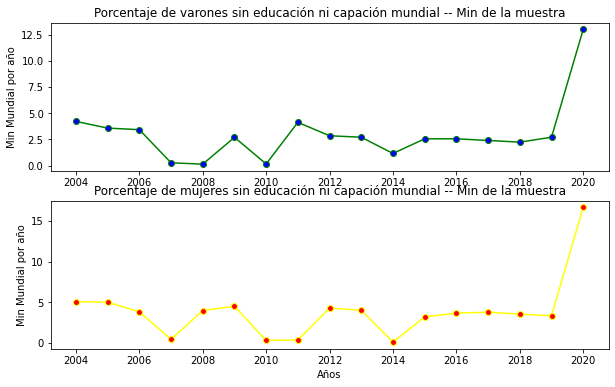

In [40]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['min'],'-ok', color = 'green', markerfacecolor = 'blue' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Min Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Min de la muestra')

ax[1].plot(m_medidas['años'],m_medidas['min'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Min Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Min de la muestra')

<ipython-input-41-729650dfa3be>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['max'],'-ok', color = 'green', markerfacecolor = 'blue' )
<ipython-input-41-729650dfa3be>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['max'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Max de la muestra')

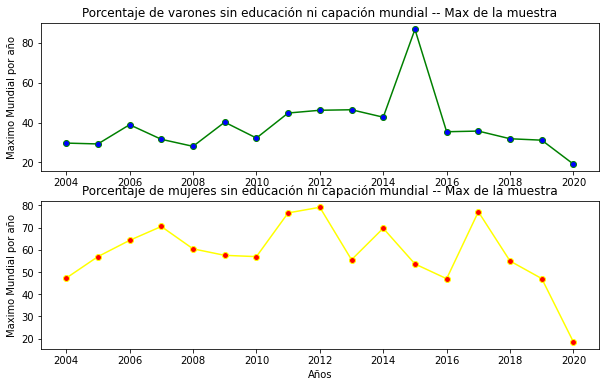

In [41]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['max'],'-ok', color = 'green', markerfacecolor = 'blue' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Maximo Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Max de la muestra')

ax[1].plot(m_medidas['años'],m_medidas['max'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Maximo Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Max de la muestra')

<ipython-input-42-a2bb036b85c3>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['quartile75'],'-ok', color = 'green', markerfacecolor = 'blue' )
<ipython-input-42-a2bb036b85c3>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['quartile75'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Cuartil 75 ')

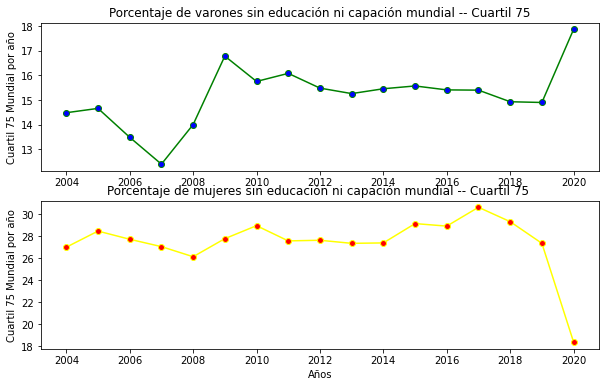

In [42]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['quartile75'],'-ok', color = 'green', markerfacecolor = 'blue' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Cuartil 75 Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Cuartil 75')

ax[1].plot(m_medidas['años'],m_medidas['quartile75'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Cuartil 75 Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Cuartil 75 ')

<ipython-input-43-f4301d29e209>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['quartile50'],'-ok', color = 'green', markerfacecolor = 'blue' )
<ipython-input-43-f4301d29e209>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['quartile50'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Cuartil 50 ')

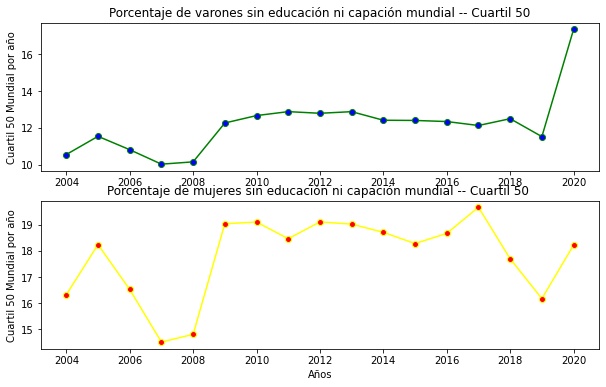

In [43]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['quartile50'],'-ok', color = 'green', markerfacecolor = 'blue' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Cuartil 50 Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Cuartil 50')

ax[1].plot(m_medidas['años'],m_medidas['quartile50'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Cuartil 50 Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Cuartil 50 ')

<ipython-input-44-481a992e3257>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(v_medidas['años'],v_medidas['rango'],'-ok', color = 'yellow', markerfacecolor = 'blue' )
<ipython-input-44-481a992e3257>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(m_medidas['años'],m_medidas['rango'],'-ok', color = 'yellow', markerfacecolor = 'red' )


Text(0.5, 1.0, 'Porcentaje de mujeres sin educación ni capación mundial -- Rango intercuartilico')

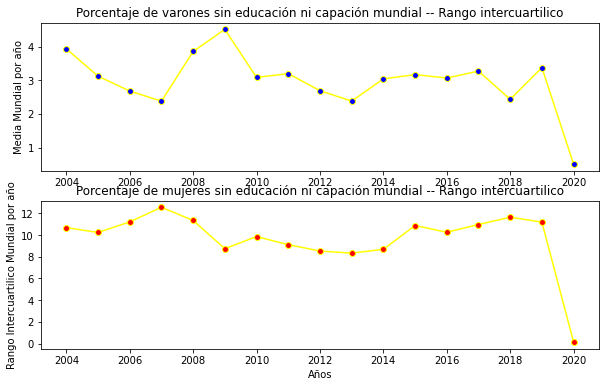

In [44]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].plot(v_medidas['años'],v_medidas['rango'],'-ok', color = 'yellow', markerfacecolor = 'blue' )
#ax[0].set_xlabel('Años')
ax[0].set_ylabel('Media Mundial por año')
ax[0].set_title('Porcentaje de varones sin educación ni capación mundial -- Rango intercuartilico')

ax[1].plot(m_medidas['años'],m_medidas['rango'],'-ok', color = 'yellow', markerfacecolor = 'red' )
ax[1].set_xlabel('Años')
ax[1].set_ylabel('Rango Intercuartilico Mundial por año')
ax[1].set_title('Porcentaje de mujeres sin educación ni capación mundial -- Rango intercuartilico')

In [58]:
df_ind_m = pd.DataFrame([m_sin_ed_indicador['country'],m_sin_ed_indicador['income_group'],m_sin_ed_indicador['2014']])
m_2014_sned = df_ind_m.transpose()
m_2014_sned

,country,income_group,2014
0,Afganistán,Países de ingreso bajo,13.26
1,Angola,Países de ingreso mediano bajo,33.560001
2,Albania,Ingreso mediano alto,32.650002
3,Argentina,Ingreso mediano alto,24.51
4,Armenia,Ingreso mediano alto,38.490002
...,...,...,...
131,Vanuatu,Países de ingreso mediano bajo,0.0
132,Samoa,Países de ingreso mediano bajo,0.0
133,Kosovo,Ingreso mediano alto,34.049999
134,"Yemen, Rep. del",Países de ingreso bajo,69.690002


In [59]:
df_ind_v = pd.DataFrame([v_sin_ed['Country Name'],m_sin_ed['2014']])
df_ind_v

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Country Name,Angola,Albania,Argentina,Armenia,Australia,Austria,Bélgica,Bangladesh,Bulgaria,Bosnia y Herzegovina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,13.26,33.560001,32.650002,24.51,38.490002,10.5,7.43,3.68,11.49,NaN,...,23.93,22.15,17.9,NaN,12.17,NaN,NaN,34.049999,69.690002,33.889999


In [60]:
v_2014_sned = df_ind_v.transpose()
v_2014_sned

,Country Name,2014
0,Angola,13.26
1,Albania,33.560001
2,Argentina,32.650002
3,Armenia,24.51
4,Australia,38.490002
...,...,...
131,NaN,NaN
132,NaN,NaN
133,NaN,34.049999
134,NaN,69.690002


<AxesSubplot:xlabel='2014'>

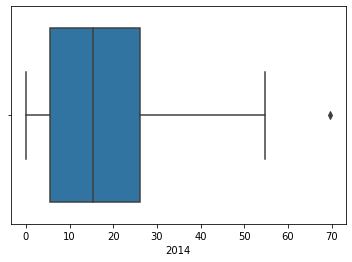

In [61]:
sns.boxplot(x=m_2014_sned['2014'])

<AxesSubplot:xlabel='2014'>

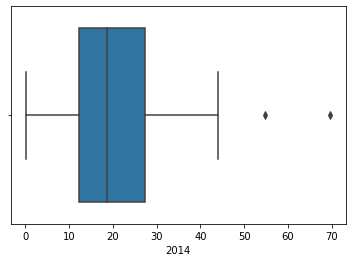

In [62]:
sns.boxplot(x=v_2014_sned['2014'])

In [63]:
m_2014_sned.std()

2014    13.222808
dtype: float64

In [64]:
v_2014_sned.std()

2014    11.633382
dtype: float64

In [65]:
m_2014_sned= m_2014_sned.sort_values('2014')

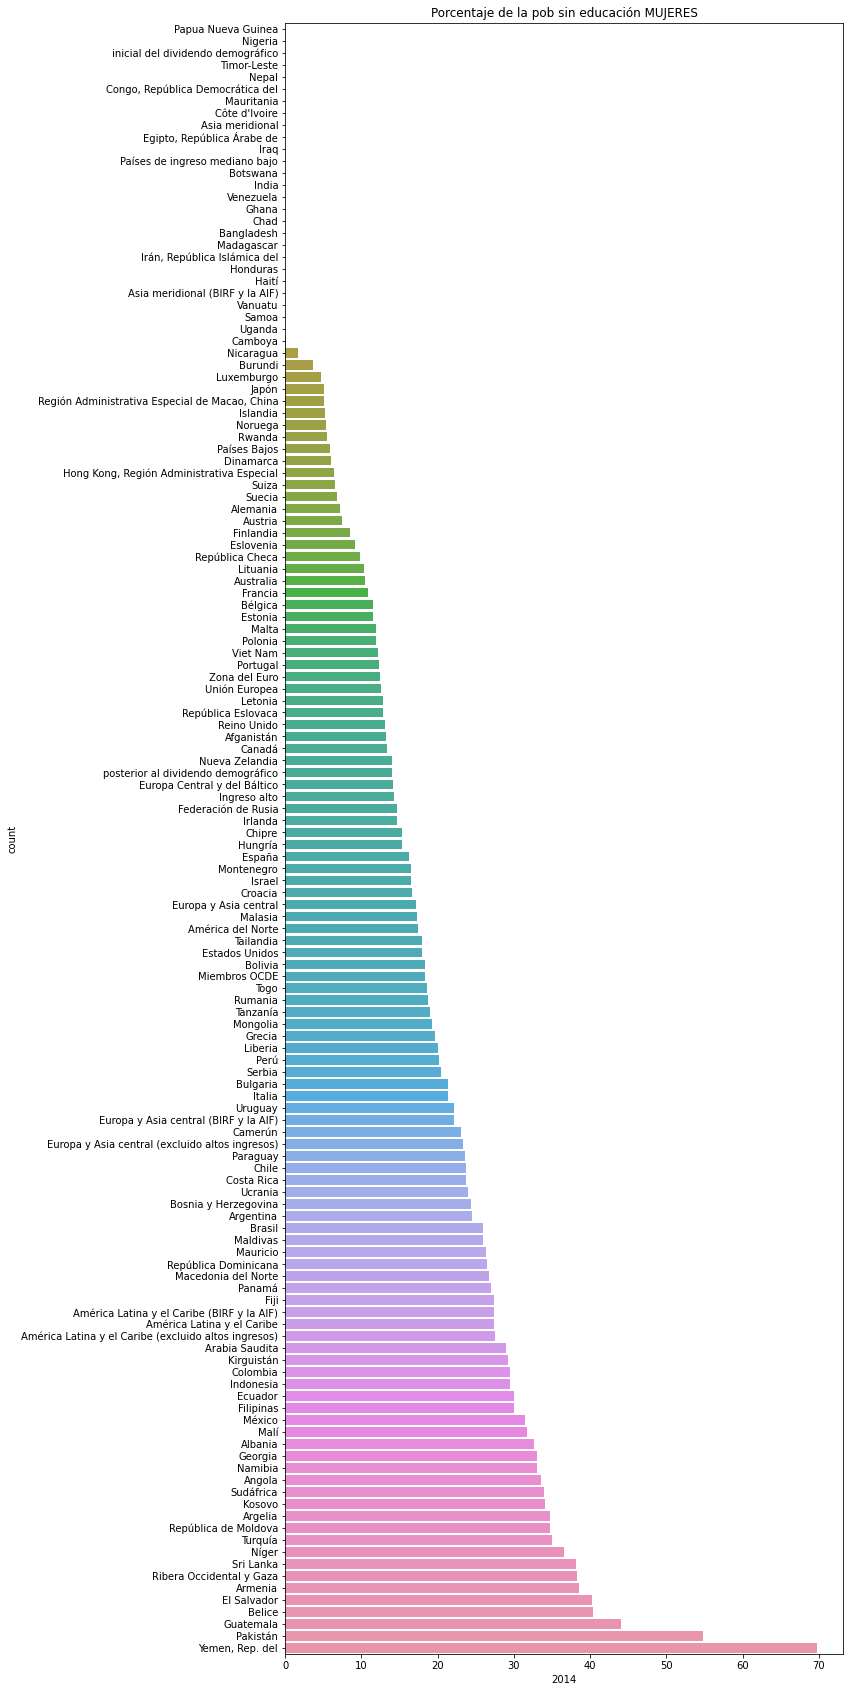

In [66]:
fig, ax = plt.subplots(figsize= (10,30))
ax = sns.barplot(x=m_2014_sned['2014'], y=m_2014_sned['country'], orient = 'h')
ax.set_title('Porcentaje de la pob sin educación MUJERES')
ax.set(ylabel='count');

In [68]:
df_ind_m9 = pd.DataFrame([m_sin_ed_indicador['country'],m_sin_ed_indicador['income_group'],m_sin_ed_indicador['2019']])
m_2019_sned = df_ind_m9.transpose()
m_2019_sned

,country,income_group,2019
0,Afganistán,Países de ingreso bajo,NaN
1,Angola,Países de ingreso mediano bajo,NaN
2,Albania,Ingreso mediano alto,25.450001
3,Argentina,Ingreso mediano alto,21.690001
4,Armenia,Ingreso mediano alto,28.709999
...,...,...,...
131,Vanuatu,Países de ingreso mediano bajo,NaN
132,Samoa,Países de ingreso mediano bajo,NaN
133,Kosovo,Ingreso mediano alto,33.91
134,"Yemen, Rep. del",Países de ingreso bajo,NaN


In [69]:
m_2019_mayor0 = m_2019_sned['2019'] > 0
m_2019_sned= m_2019_sned[m_2019_mayor0]

In [70]:
m_2019_sned= m_2019_sned.sort_values('2019')

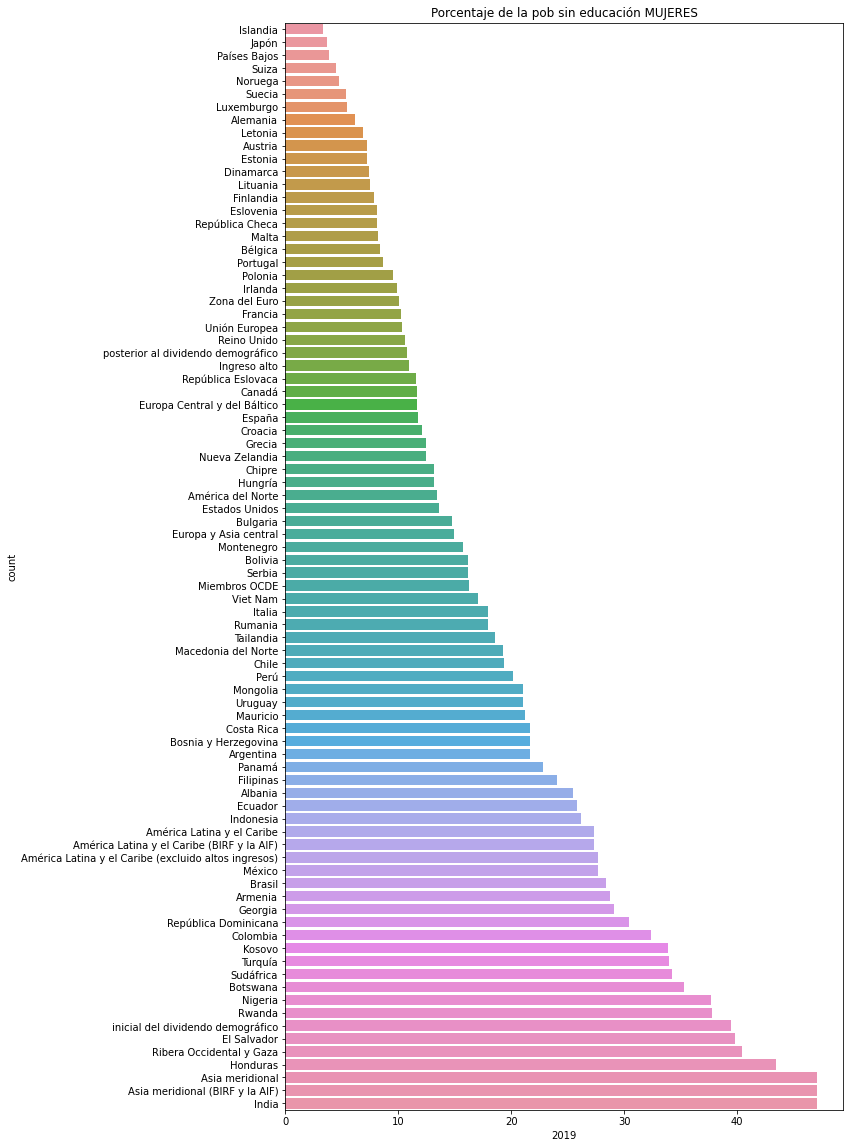

In [71]:
fig, ax = plt.subplots(figsize= (10,20))
ax = sns.barplot(x=m_2019_sned['2019'], y=m_2019_sned['country'], orient = 'h')
ax.set_title('Porcentaje de la pob sin educación MUJERES')
ax.set(ylabel='count');

In [80]:
m_2014_filtrado= m_2014_sned['2014'] > 0
m_2014_filtrado=m_2014_sned[m_2014_filtrado]

In [81]:
mexico = m_2014_filtrado['country'] == 'México'
m_2014_filtrado[mexico]

,country,income_group,2014
77,México,Ingreso mediano alto,31.450001


In [82]:
yemen_1= m_2014_filtrado['country'] == 'Yemen, Rep. del'
yemen_1 =m_2014_filtrado[yemen_1]
yemen_1

,country,income_group,2014
134,"Yemen, Rep. del",Países de ingreso bajo,69.690002


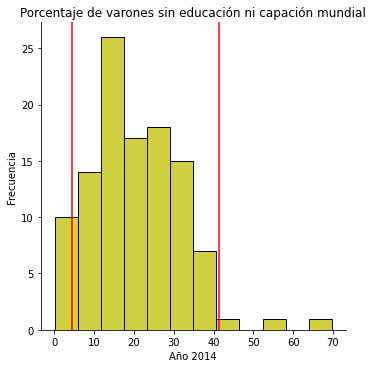

In [83]:
limite_inferior = m_2014_filtrado['2014'].quantile(0.025)
limite_superior = m_2014_filtrado['2014'].quantile(0.975)
ax = sns.displot(m_2014_filtrado['2014'], color = 'y')
plt.xlabel('Año 2014')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de varones sin educación ni capación mundial');
plt.axvline(limite_inferior, color= 'r')
plt.axvline(limite_superior,color = 'r');

In [84]:
df_ind_m = pd.DataFrame([m_sin_ed_indicador['country'],m_sin_ed_indicador['income_group'],m_sin_ed_indicador['2018']])
m_2018_sned = df_ind_m.transpose()
m_2018_sned

,country,income_group,2018
0,Afganistán,Países de ingreso bajo,NaN
1,Angola,Países de ingreso mediano bajo,NaN
2,Albania,Ingreso mediano alto,27.77
3,Argentina,Ingreso mediano alto,22.49
4,Armenia,Ingreso mediano alto,33.73
...,...,...,...
131,Vanuatu,Países de ingreso mediano bajo,NaN
132,Samoa,Países de ingreso mediano bajo,NaN
133,Kosovo,Ingreso mediano alto,29.99
134,"Yemen, Rep. del",Países de ingreso bajo,NaN


In [85]:
m_2019_mayor0 = m_2019_sned['2019'] > 0
m_2019_filtrado= m_2019_sned[m_2019_mayor0]

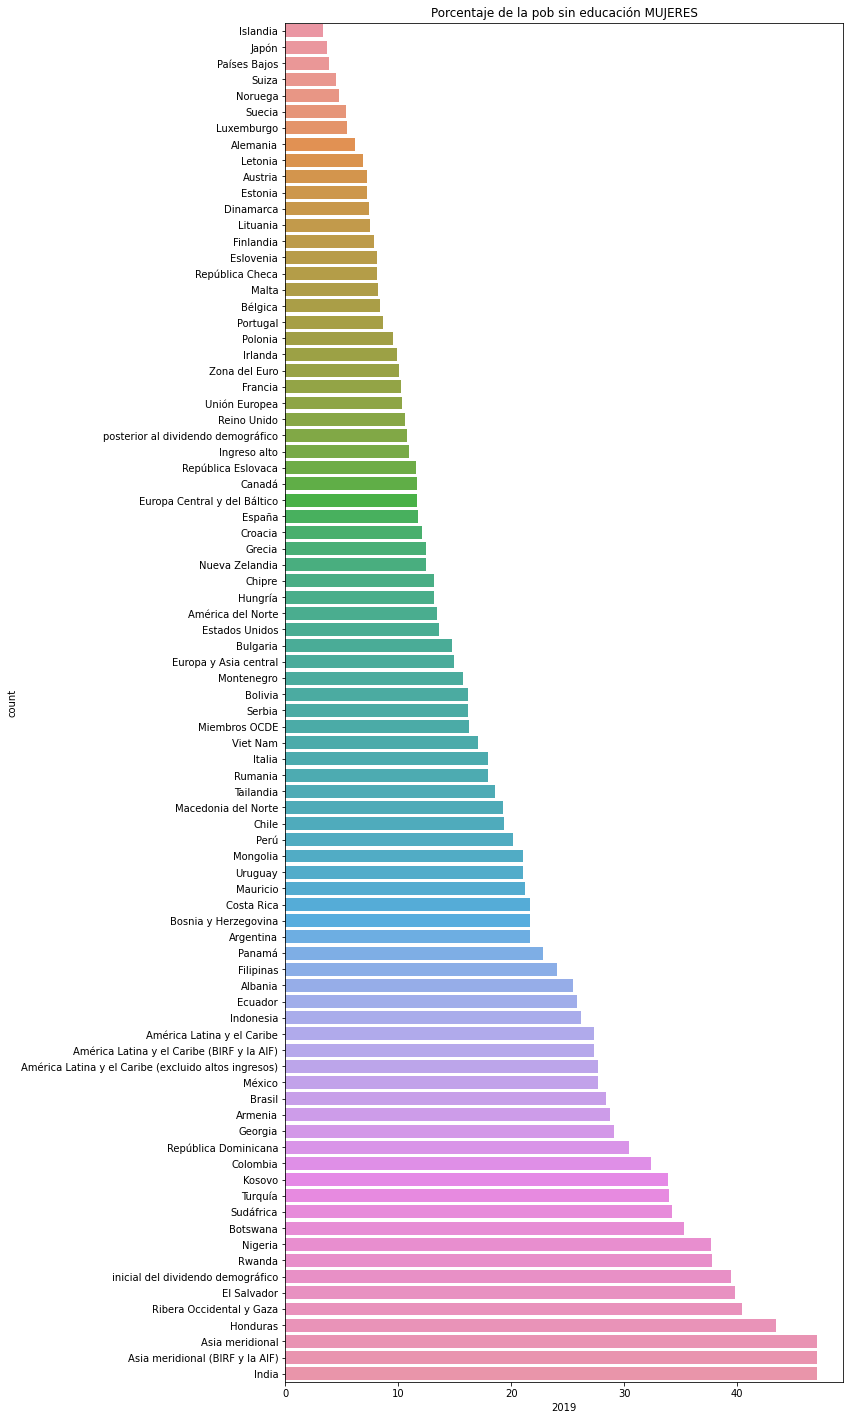

In [86]:
fig, ax = plt.subplots(figsize= (10,25))
ax = sns.barplot(x=m_2019_filtrado['2019'], y=m_2019_filtrado['country'], orient = 'h')
ax.set_title('Porcentaje de la pob sin educación MUJERES')
ax.set(ylabel='count');

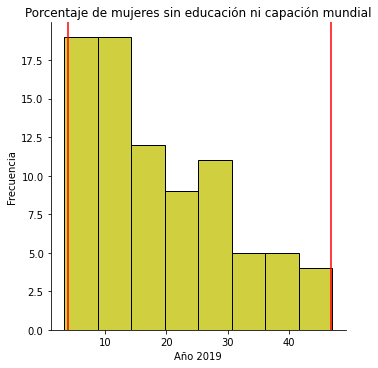

In [87]:
limite_inferior9 = m_2019_filtrado['2019'].quantile(0.025)
limite_superior9 = m_2019_filtrado['2019'].quantile(0.975)
ax9 = sns.displot(m_2019_filtrado['2019'], color = 'y')
plt.xlabel('Año 2019')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de mujeres sin educación ni capación mundial');
plt.axvline(limite_inferior9, color= 'r')
plt.axvline(limite_superior9,color = 'r');

In [100]:
yemen = pd.read_csv('yemen.csv',  encoding = 'ISO-8859-1')
yemen.set_index('indicador', inplace = True)
yemen


In [102]:
yemen.isna().sum()

indicador
agua_potable_all_area          0
agua_potable_rural             0
agua_potable_urban             0
pobreza_15+                    0
pobreza_15_24                  0
pobreza_25+                    0
prop_varones_desempleo         0
zonas_marginales              13
SKILL_MATH                    12
prop_mujeres_sin_ed_empleo    17
dtype: int64

Tenemos que quitar las columnas con Nulos

In [109]:
yemen_drop=yemen.drop(['zonas_marginales','SKILL_MATH','prop_mujeres_sin_ed_empleo'])

In [111]:
yemen_cor = yemen_drop.transpose()
yemen_cor

indicador,agua_potable_all_area,agua_potable_rural,agua_potable_urban,pobreza_15+,pobreza_15_24,pobreza_25+,prop_varones_desempleo
2000,37.84694,25.64115,72.10930,4.7,4.7,4.7,12.32
2001,38.08858,25.64115,72.10930,5.1,5.0,5.1,12.23
2002,38.33393,25.64115,72.10930,5.4,5.2,5.4,12.22
2003,40.34536,27.87679,72.64883,5.7,5.5,5.8,12.16
2004,42.34168,30.11242,73.18836,6.0,5.7,6.1,12.05
2005,44.32173,32.34806,73.72789,5.8,5.5,5.9,11.92
2006,46.28643,34.58370,74.26743,6.1,5.7,6.2,11.74
2007,48.23499,36.81933,74.80696,6.4,6.0,6.6,11.57
2008,50.16707,39.05497,75.34649,6.4,6.0,6.6,11.50
2009,52.08230,41.29060,75.88603,6.5,6.1,6.6,11.88


In [112]:
yemen_cor.isna().sum()

indicador
agua_potable_all_area     0
agua_potable_rural        0
agua_potable_urban        0
pobreza_15+               0
pobreza_15_24             0
pobreza_25+               0
prop_varones_desempleo    0
dtype: int64

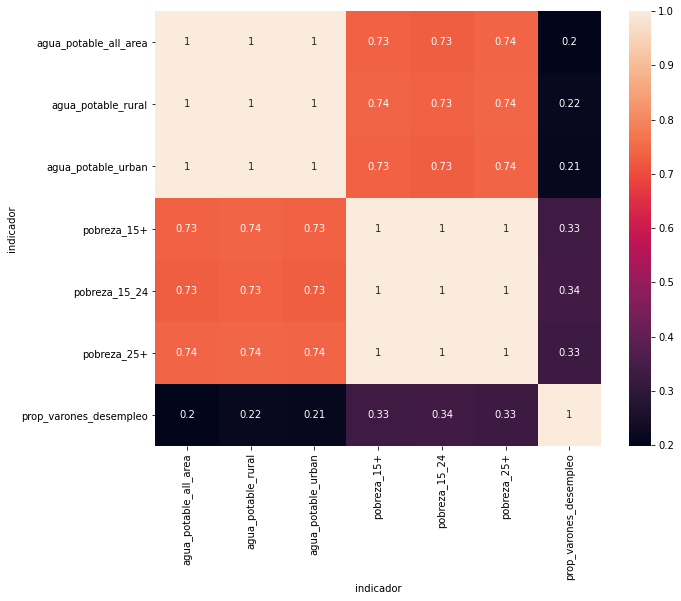

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(yemen_cor.corr(), annot=True);

In [118]:
canada = pd.read_csv('canada_2.csv',  encoding = 'ISO-8859-1')
canada.set_index('indicador', inplace = True)
canada


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
indicador,,,,,,,,,,,,,,
desempleo_varones,6.940000,7.530000,8.130000,7.930000,7.480000,7.010000,6.520000,6.380000,6.570000,9.53000,8.790000,7.96000,7.71000,7.50000
desempleo_mujeres(activ),6.690000,6.860000,7.120000,7.160000,6.850000,6.460000,6.090000,5.650000,5.650000,7.01000,7.230000,7.01000,6.82000,6.60000
desempleo_grl,6.940000,7.530000,8.130000,7.930000,7.480000,7.010000,6.520000,6.380000,6.570000,9.53000,8.790000,7.96000,7.71000,7.50000
varones_sin_ed,11.970000,12.300000,12.980000,13.440000,13.130000,12.790000,12.480000,11.870000,12.740000,15.37000,14.680000,13.82000,14.06000,13.55000
mujeres_sin_ed,12.200000,12.450000,12.590000,12.950000,13.040000,12.770000,12.250000,12.780000,12.750000,13.32000,13.510000,13.41000,13.50000,13.40000
agua_potable_ALLAREA,99.111830,99.115730,99.116650,99.117580,99.118490,99.143130,99.167860,99.193500,99.218980,99.24432,99.269500,99.29436,99.31808,99.34176
agua_potable_RURAL,98.176800,98.176800,98.176800,98.176800,98.176800,98.230950,98.285100,98.339250,98.393400,98.44755,98.501700,98.55585,98.61000,98.66415
agua_potable_URBAN,99.353260,99.353260,99.353260,99.353260,99.353260,99.369440,99.385620,99.401800,99.417980,99.43416,99.450340,99.46652,99.48270,99.49888
zonas_marginales,1.500000,1.300000,0.800000,0.600000,0.610000,0.250000,0.100000,0.100000,0.100000,0.09000,0.100000,0.08000,0.10000,0.10000


In [119]:
canada.isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
dtype: int64

In [120]:
canada_cor = canada.transpose()
canada_cor

indicador,desempleo_varones,desempleo_mujeres(activ),desempleo_grl,varones_sin_ed,mujeres_sin_ed,agua_potable_ALLAREA,agua_potable_RURAL,agua_potable_URBAN,zonas_marginales,SKILL_MATH,SKILL_READ
2000,6.94,6.69,6.94,11.97,12.20,99.11183,98.17680,99.35326,1.50,90.592376,90.442186
2001,7.53,6.86,7.53,12.30,12.45,99.11573,98.17680,99.35326,1.30,89.879691,90.460561
2002,8.13,7.12,8.13,12.98,12.59,99.11665,98.17680,99.35326,0.80,89.213391,89.044116
2003,7.93,7.16,7.93,13.44,12.95,99.11758,98.17680,99.35326,0.60,89.213391,89.044116
2004,7.48,6.85,7.48,13.13,13.04,99.11849,98.17680,99.35326,0.61,88.523667,89.710925
2005,7.01,6.46,7.01,12.79,12.77,99.14313,98.23095,99.36944,0.25,89.213391,89.044116
2006,6.52,6.09,6.52,12.48,12.25,99.16786,98.28510,99.38562,0.10,86.171054,89.105212
2007,6.38,5.65,6.38,11.87,12.78,99.19350,98.33925,99.40180,0.10,86.213391,89.044116
2008,6.57,5.65,6.57,12.74,12.75,99.21898,98.39340,99.41798,0.10,85.637282,89.318583
2009,9.53,7.01,9.53,15.37,13.32,99.24432,98.44755,99.43416,0.09,84.442900,89.904300


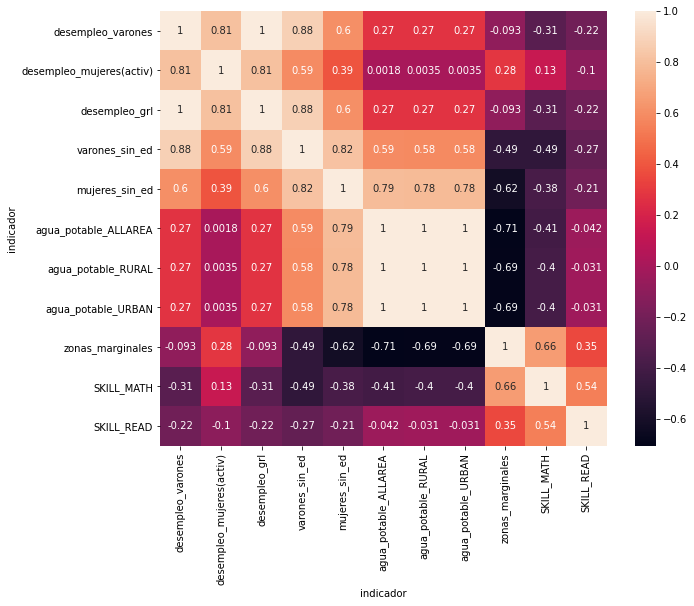

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(canada_cor.corr(), annot=True);

In [137]:
desempleo_m_curtosis=m_desempleo_pobact.kurtosis()
desempleo_m_mean=m_desempleo_pobact.mean()
desempleo_m_median=m_desempleo_pobact.median()
desempleo_m_min=m_desempleo_pobact.min()
desempleo_m_max=m_desempleo_pobact.max()
desempleo_m_std=m_desempleo_pobact.std()

In [138]:
m_desempleo_medidas= pd.DataFrame ({'Cutosis':desempleo_m_curtosis, 'mean':desempleo_m_mean, 'median':desempleo_m_median,
                                  'min':desempleo_m_min, 'max':desempleo_m_max, 'std':desempleo_m_std })
m_desempleo_medidas

,Cutosis,mean,median,min,max,std
1991,4.179159,8.228163,5.680000,0.08,46.0,7.528677
1992,4.498208,8.342803,5.660000,0.19,46.61,7.488401
1993,4.320701,8.811634,6.280000,0.23,47.02,7.530252
1994,4.496960,9.133278,6.900000,0.27,47.35,7.522104
1995,4.349666,9.322586,7.010000,0.32,47.4,7.544361
1996,4.445412,9.464664,7.270000,0.34,47.59,7.428531
1997,4.561874,9.410117,7.250000,0.29,47.23,7.351283
1998,4.120120,9.448978,7.330000,0.31,45.62,7.190252
1999,3.471212,9.507056,7.220000,0.32,44.38,7.078295
2000,3.219774,9.407227,7.045676,0.32,43.32,7.188366
